In [1]:
import numpy as np 
import pandas as pd 
from sklearn.datasets import load_iris

In [56]:
X,y = load_iris(return_X_y=True, as_frame=True)

In [57]:
df = X
df['Species'] = y
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [58]:
df_trim = df[['sepal width (cm)', 'petal length (cm)','Species']]

In [59]:
df_trim = df_trim[df_trim['Species'] != 0][['sepal width (cm)','petal length (cm)','Species']]

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='sepal width (cm)', ylabel='petal length (cm)'>

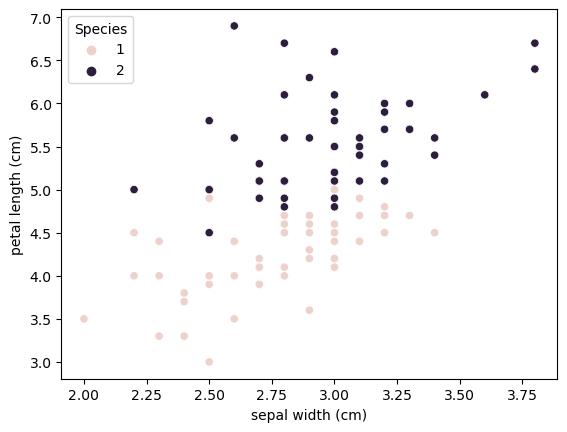

In [61]:
sns.scatterplot(x=df_trim['sepal width (cm)'], y=df_trim['petal length (cm)'], hue=df_trim['Species'])

In [62]:
df_train = df_trim.iloc[:60, :].sample(10)
df_train

,sepal width (cm),petal length (cm),Species
104,3.0,5.8,2
84,3.0,4.5,1
60,2.0,3.5,1
103,2.9,5.6,2
86,3.1,4.7,1
102,3.0,5.9,2
51,3.2,4.5,1
62,2.2,4.0,1
97,2.9,4.3,1
64,2.9,3.6,1


In [63]:
# Taking only 10 rows for training
df_trim = df_trim.sample(100)
df_train = df_trim.iloc[:60,:].sample(10)
df_val = df_trim.iloc[60:80,:].sample(5)
df_test = df_trim.iloc[80:,:].sample(5)

In [64]:
df_train

,sepal width (cm),petal length (cm),Species
108,2.5,5.8,2
123,2.7,4.9,2
53,2.3,4.0,1
79,2.6,3.5,1
68,2.2,4.5,1
73,2.8,4.7,1
50,3.2,4.7,1
105,3.0,6.6,2
135,3.0,6.1,2
65,3.1,4.4,1


In [65]:
df_val

,sepal width (cm),petal length (cm),Species
116,3.0,5.5,2
127,3.0,4.9,2
118,2.6,6.9,2
67,2.7,4.1,1
146,2.5,5.0,2


In [66]:
df_test

,sepal width (cm),petal length (cm),Species
91,3.0,4.6,1
130,2.8,6.1,2
70,3.2,4.8,1
63,2.9,4.7,1
134,2.6,5.6,2


In [67]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [68]:
y_test

array([2, 2, 2, 1, 2])

### **Case1- Bagging**

In [69]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

df_bag

,sepal width (cm),petal length (cm),Species
50,3.2,4.7,1
108,2.5,5.8,2
108,2.5,5.8,2
53,2.3,4.0,1
135,3.0,6.1,2
79,2.6,3.5,1
123,2.7,4.9,2
68,2.2,4.5,1


In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [71]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [72]:
dt_bag1 = DecisionTreeClassifier()

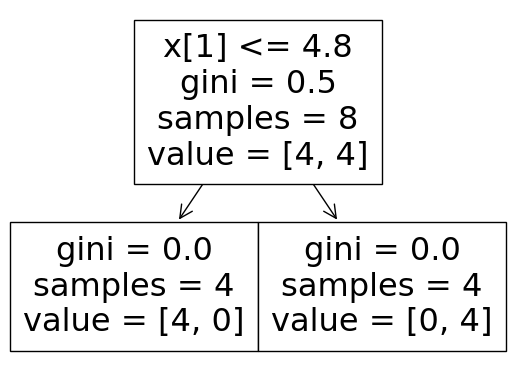

c:\Users\dhanr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\dhanr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


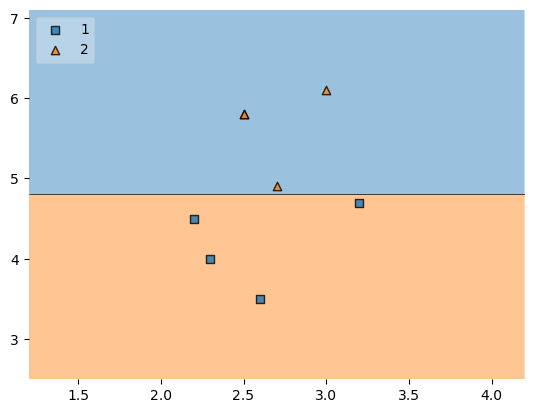

In [73]:
evaluate(dt_bag1,X,y)

In [74]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),Species
68,2.2,4.5,1
108,2.5,5.8,2
73,2.8,4.7,1
73,2.8,4.7,1
105,3.0,6.6,2
105,3.0,6.6,2
108,2.5,5.8,2
53,2.3,4.0,1


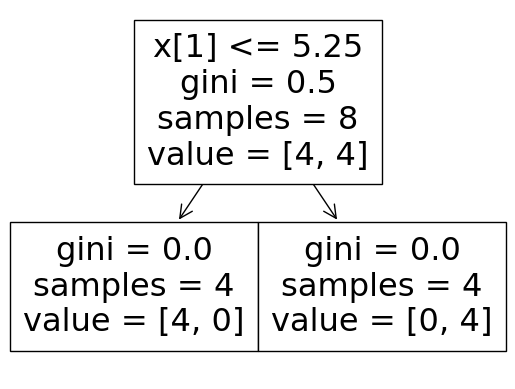

c:\Users\dhanr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\dhanr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.6


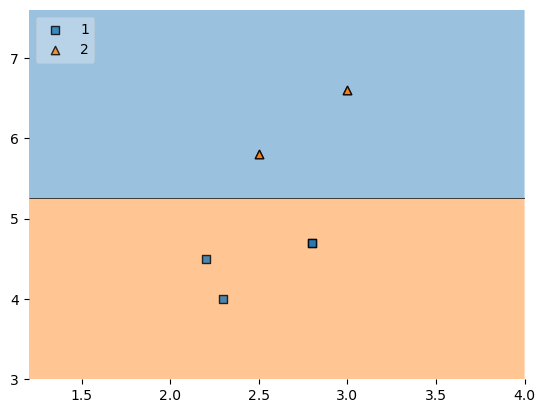

In [75]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [76]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,sepal width (cm),petal length (cm),Species
123,2.7,4.9,2
68,2.2,4.5,1
123,2.7,4.9,2
135,3.0,6.1,2
135,3.0,6.1,2
50,3.2,4.7,1
105,3.0,6.6,2
73,2.8,4.7,1


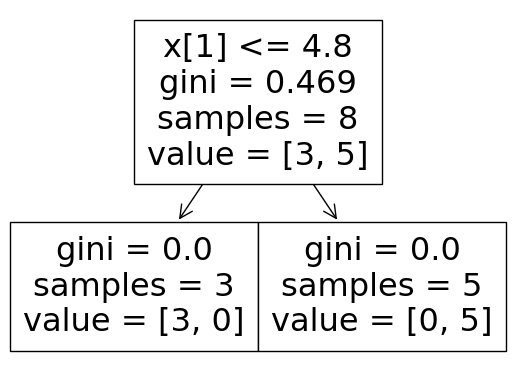

c:\Users\dhanr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\dhanr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1.0


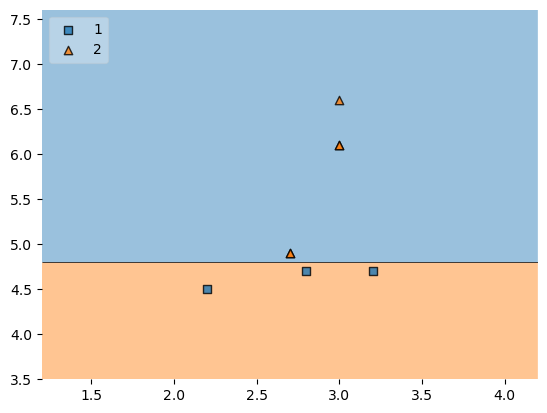

In [77]:
dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

In [78]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf=clf, legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

### **Predict**

In [79]:
df_test

,sepal width (cm),petal length (cm),Species
91,3.0,4.6,1
130,2.8,6.1,2
70,3.2,4.8,1
63,2.9,4.7,1
134,2.6,5.6,2


In [80]:
print("Predictor 1",dt_bag1.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([2.2,5.0]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([2.2,5.0]).reshape(1,2)))

Predictor 1 [2]
Predictor 2 [1]
Predictor 3 [2]


c:\Users\dhanr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\dhanr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
c:\Users\dhanr\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


### **Pasting**

In [81]:
# Row sampling without replacement
df_train

,sepal width (cm),petal length (cm),Species
108,2.5,5.8,2
123,2.7,4.9,2
53,2.3,4.0,1
79,2.6,3.5,1
68,2.2,4.5,1
73,2.8,4.7,1
50,3.2,4.7,1
105,3.0,6.6,2
135,3.0,6.1,2
65,3.1,4.4,1


In [82]:
df_train.sample(8)


,sepal width (cm),petal length (cm),Species
135,3.0,6.1,2
53,2.3,4.0,1
65,3.1,4.4,1
123,2.7,4.9,2
105,3.0,6.6,2
68,2.2,4.5,1
79,2.6,3.5,1
50,3.2,4.7,1


### **Random Subspaces**

In [83]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [84]:
df.sample(2,replace=True,axis=1)

,Species,sepal width (cm)
0,0,3.5
1,0,3.0
2,0,3.2
3,0,3.1
4,0,3.6
...,...,...
145,2,3.0
146,2,2.5
147,2,3.0
148,2,3.4


### **Random Patches**

In [86]:
df.sample(8,replace=True).sample(2,replace=True,axis=1)

,sepal length (cm),Species
64,5.6,1
2,4.7,0
23,5.1,0
19,5.1,0
100,6.3,2
18,5.7,0
34,4.9,0
103,6.3,2
